### Part 1 : EDA 
<ul><li>For completing the reports 1 and 2</li>
    <li>Report 1 - Survivors by class, age band and gender</li> 
    <li>Report 2 - Count of survivors by State</li> 
 </ul>   

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/titanic.csv')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


In [5]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Matti Alexanteri Maenpaa,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


#### A. Report 1

In [6]:
# Survivors by class

df_class = df[df['Survived']==1].groupby(['Pclass'])['Survived'].count().to_frame().reset_index()
df_class.to_csv('report1.csv', index=False)

In [7]:
df_class

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [8]:
# Survivors by age band

df_age = df.copy()
df_age['Age Band'] = pd.cut(df_age['Age'], np.arange(0, 90.0, 10))

Need to bin the age, choosing bin size of 10, max age is 80.

In [9]:
df_age.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Age Band
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,"(20.0, 30.0]"
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,"(30.0, 40.0]"
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,"(20.0, 30.0]"
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,"(30.0, 40.0]"
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,"(30.0, 40.0]"


In [10]:
df_age = df_age[df_age['Survived']==1].groupby(['Age Band'])['Survived'].count().to_frame().reset_index()
df_age.to_csv('report1.csv', mode='a', index=False)

In [11]:
df_age

,Age Band,Survived
0,"(0.0, 10.0]",41
1,"(10.0, 20.0]",52
2,"(20.0, 30.0]",104
3,"(30.0, 40.0]",80
4,"(40.0, 50.0]",43
5,"(50.0, 60.0]",17
6,"(60.0, 70.0]",4
7,"(70.0, 80.0]",1


In [12]:
# Survivors by gender

df_gender = df[df['Survived']==1].groupby(['Sex'])['Survived'].count().to_frame().reset_index()
df_gender.to_csv('report1.csv', mode='a', index=False)

In [13]:
df_gender

,Sex,Survived
0,female,233
1,male,109


#### B. Report 2
NOTE - For report 2, what is state? there is not description of the state?
is it same as the class, what has to be considered?

### Part 2 : Predictive Modelling 
<ul><li>Create a predictive model of survivors using Spark ML
    </li>
    <li>Determine fewest number of dimensions from the dataset to arrive at a statiscally relevant result</li>
</ul>

In [14]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### A. Cleaning/ Transforming Data
- Since we have a features like Age and Sex, we first need to convert them to categorical features
- Also, features like Siblings.. Parents.. can be combined to one 'Family'
- Name can be dropped too, obvious reasons
- Check for null values (None)


In [15]:
# convert Age to categorical

df_new = df.copy()
df_new['Age Band'] = pd.cut(df_new['Age'], np.arange(0, 90.0, 10), labels=[1,2,3,4,5,6,7,8])

In [16]:
# merge Siblings/Parents to get Family

df_new['Family_Size'] = df_new['Siblings/Spouses Aboard']+ df_new['Parents/Children Aboard']


In [17]:
df_new.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Age Band,Family_Size
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,3,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,4,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,3,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,4,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,4,0


In [18]:
# drop features that are irrelevant

df_new1 = df_new.drop(columns=['Name','Age','Siblings/Spouses Aboard', 'Parents/Children Aboard'])

In [19]:
df_new1.head()

,Survived,Pclass,Sex,Fare,Age Band,Family_Size
0,0,3,male,7.2500,3,1
1,1,1,female,71.2833,4,1
2,1,3,female,7.9250,3,0
3,1,1,female,53.1000,4,1
4,0,3,male,8.0500,4,0


In [20]:
# convert Sex to categorical, avoid dummies

df_sex = pd.get_dummies(df_new1['Sex'], drop_first=True)

In [21]:
df_sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
df_new2 = pd.concat([df_new1.drop(columns=['Sex']), df_sex], axis=1)
df_new2.head()

,Survived,Pclass,Fare,Age Band,Family_Size,male
0,0,3,7.2500,3,1,1
1,1,1,71.2833,4,1,0
2,1,3,7.9250,3,0,0
3,1,1,53.1000,4,1,0
4,0,3,8.0500,4,0,1


Now we have something that can be investigated. Further steps - 
- Categorize Fare?
- Do a scatterplot/ correlation matrix

In [23]:
df_new2['Fare'].describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64

We can probably categorize/ discretize Fare into equal-sized buckets based on quantiles using qcut.

In [26]:
pd.qcut(df_new2['Fare'], 5).value_counts() #choosing quintiles

(7.858, 10.5]        182
(22.225, 39.688]     179
(-0.001, 7.858]      178
(39.688, 512.329]    176
(10.5, 22.225]       172
Name: Fare, dtype: int64

In [27]:
df_new2['Fare'] = pd.qcut(df_new2['Fare'], 5, labels= [1, 2, 3, 4, 5])

In [28]:
df_new2.head()

,Survived,Pclass,Fare,Age Band,Family_Size,male
0,0,3,1,3,1,1
1,1,1,5,4,1,0
2,1,3,2,3,0,0
3,1,1,5,4,1,0
4,0,3,2,4,0,1


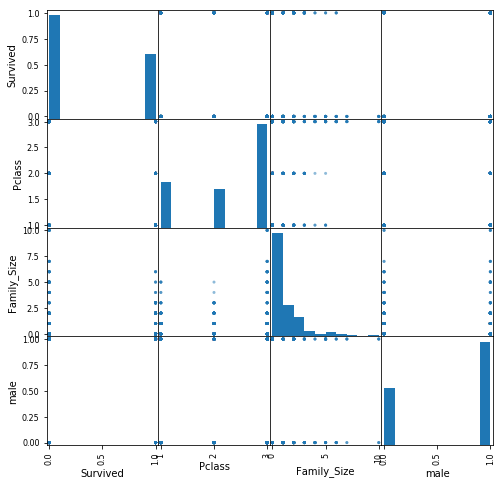

In [52]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix as sc

sc(df_new2, alpha=0.5, figsize=(8, 8))
plt.show()

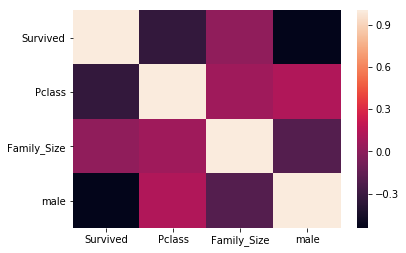

In [76]:
import seaborn as sns

# calculate the correlation matrix
corr = df_new2.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [78]:
# storing the preprocessed data for spark

df_new2.to_csv('data/processed.csv', index=False)

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('titanic').getOrCreate()
df = spark.read.csv('data/processed.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Fare: integer (nullable = true)
 |-- Age Band: integer (nullable = true)
 |-- Family_Size: integer (nullable = true)
 |-- male: integer (nullable = true)



In [3]:
from pyspark.ml.feature import VectorAssembler

feature = VectorAssembler(inputCols=df.columns[1:],outputCol="features")
feature_vector= feature.transform(df)

In [4]:
feature_vector.show()

+--------+------+----+--------+-----------+----+--------------------+
|Survived|Pclass|Fare|Age Band|Family_Size|male|            features|
+--------+------+----+--------+-----------+----+--------------------+
|       0|     3|   1|       3|          1|   1|[3.0,1.0,3.0,1.0,...|
|       1|     1|   5|       4|          1|   0|[1.0,5.0,4.0,1.0,...|
|       1|     3|   2|       3|          0|   0|[3.0,2.0,3.0,0.0,...|
|       1|     1|   5|       4|          1|   0|[1.0,5.0,4.0,1.0,...|
|       0|     3|   2|       4|          0|   1|[3.0,2.0,4.0,0.0,...|
|       0|     3|   2|       3|          0|   1|[3.0,2.0,3.0,0.0,...|
|       0|     1|   5|       6|          0|   1|[1.0,5.0,6.0,0.0,...|
|       0|     3|   3|       1|          4|   1|[3.0,3.0,1.0,4.0,...|
|       1|     3|   3|       3|          2|   0|[3.0,3.0,3.0,2.0,...|
|       1|     2|   4|       2|          1|   0|[2.0,4.0,2.0,1.0,...|
|       1|     3|   3|       1|          2|   0|[3.0,3.0,1.0,2.0,...|
|       1|     1|   

In [5]:
(trainingData, testData) = feature_vector.randomSplit([0.8, 0.2],seed = 9)

In [6]:
from pyspark.ml.classification import DecisionTreeClassifier
classifier = DecisionTreeClassifier(labelCol="Survived", featuresCol="features")
model = classifier.fit(trainingData)
dprediction = model.transform(testData)
dt_prediction.select("prediction", "Survived", "features").show()

+----------+--------+--------------------+
|prediction|Survived|            features|
+----------+--------+--------------------+
|       1.0|       0|[1.0,4.0,3.0,0.0,...|
|       1.0|       0|[1.0,4.0,3.0,0.0,...|
|       1.0|       0|[1.0,4.0,3.0,0.0,...|
|       1.0|       0|[1.0,4.0,4.0,1.0,...|
|       1.0|       0|[1.0,4.0,5.0,0.0,...|
|       0.0|       0|[1.0,4.0,6.0,0.0,...|
|       0.0|       0|[1.0,4.0,7.0,0.0,...|
|       0.0|       0|[1.0,4.0,7.0,0.0,...|
|       0.0|       0|[1.0,5.0,3.0,1.0,...|
|       0.0|       0|[1.0,5.0,4.0,0.0,...|
|       0.0|       0|[1.0,5.0,4.0,0.0,...|
|       0.0|       0|[1.0,5.0,5.0,1.0,...|
|       0.0|       0|[2.0,1.0,2.0,0.0,...|
|       0.0|       0|[2.0,1.0,3.0,0.0,...|
|       0.0|       0|[2.0,1.0,3.0,0.0,...|
|       0.0|       0|[2.0,1.0,3.0,0.0,...|
|       0.0|       0|[2.0,1.0,4.0,0.0,...|
|       0.0|       0|[2.0,2.0,4.0,0.0,...|
|       0.0|       0|[2.0,2.0,4.0,0.0,...|
|       0.0|       0|[2.0,2.0,4.0,0.0,...|
+----------

### Part 3 : Evaluation and Results
<ul><li>Report 3 - Test your model and show performance against actual
    </li></ul>

In [10]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Survived", predictionCol="prediction", metricName="accuracy")
dt_accuracy = evaluator.evaluate(dt_prediction)
print("Accuracy of DecisionTreeClassifier is = %g"% (dt_accuracy))
print("Test Error of DecisionTreeClassifier = %g " % (1.0 - dt_accuracy))

Accuracy of DecisionTreeClassifier is = 0.846591
Test Error of DecisionTreeClassifier = 0.153409 
